In [80]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import altair as alt
import plotly.express as px

# Configure Altair for better notebook display
alt.data_transformers.enable('json')
alt.data_transformers.disable_max_rows()
alt.theme.enable('default')  # Use default theme for better visibility

# Set renderer for Jupyter notebooks
try:
    # Try to use the 'default' renderer which works in most Jupyter environments
    alt.renderers.enable('default')
    print("✅ Altair configured for optimal notebook display")
    print("📊 All charts should now render properly!")
except:
    # Fallback to 'html' renderer if 'default' is not available
    alt.renderers.enable('html')
    print("✅ Altair configured with HTML renderer")
    print("📊 Charts should render in HTML format")

✅ Altair configured for optimal notebook display
📊 All charts should now render properly!


In [81]:
data = pd.read_csv('../data/raw/NY-House-Dataset.csv')
data.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


# EDA, plots

In [82]:
data.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [83]:
# Get the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [84]:
columns = data.columns
for col in columns:
    if data[col].dtype == 'object':
        print(f"{col}: {data[col].nunique()} unique values")
        print(f"{col}: {data[col].value_counts()}\n")
    else:
        print(f"{col}: min={data[col].min()}, max={data[col].max()}, mean={data[col].mean()}, std={data[col].std()}")

BROKERTITLE: 1036 unique values
BROKERTITLE: BROKERTITLE
Brokered by COMPASS                              456
Brokered by Douglas Elliman - 575 Madison Ave    110
Brokered by Brown Harris Stevens                  93
Brokered by Corcoran East Side                    91
Brokered by RE MAX Edge                           79
                                                ... 
Brokered by Gerard R Desgranges                    1
Brokered by Property Professional Realty           1
Brokered by Mark Murphy Properties                 1
Brokered by S Sharf Realty Inc                     1
Brokered by New York Way Real Estate Corp          1
Name: count, Length: 1036, dtype: int64

TYPE: 13 unique values
TYPE: TYPE
Co-op for sale                1450
House for sale                1012
Condo for sale                 891
Multi-family home for sale     727
Townhouse for sale             299
Pending                        243
Contingent                      88
Land for sale                   49
For s

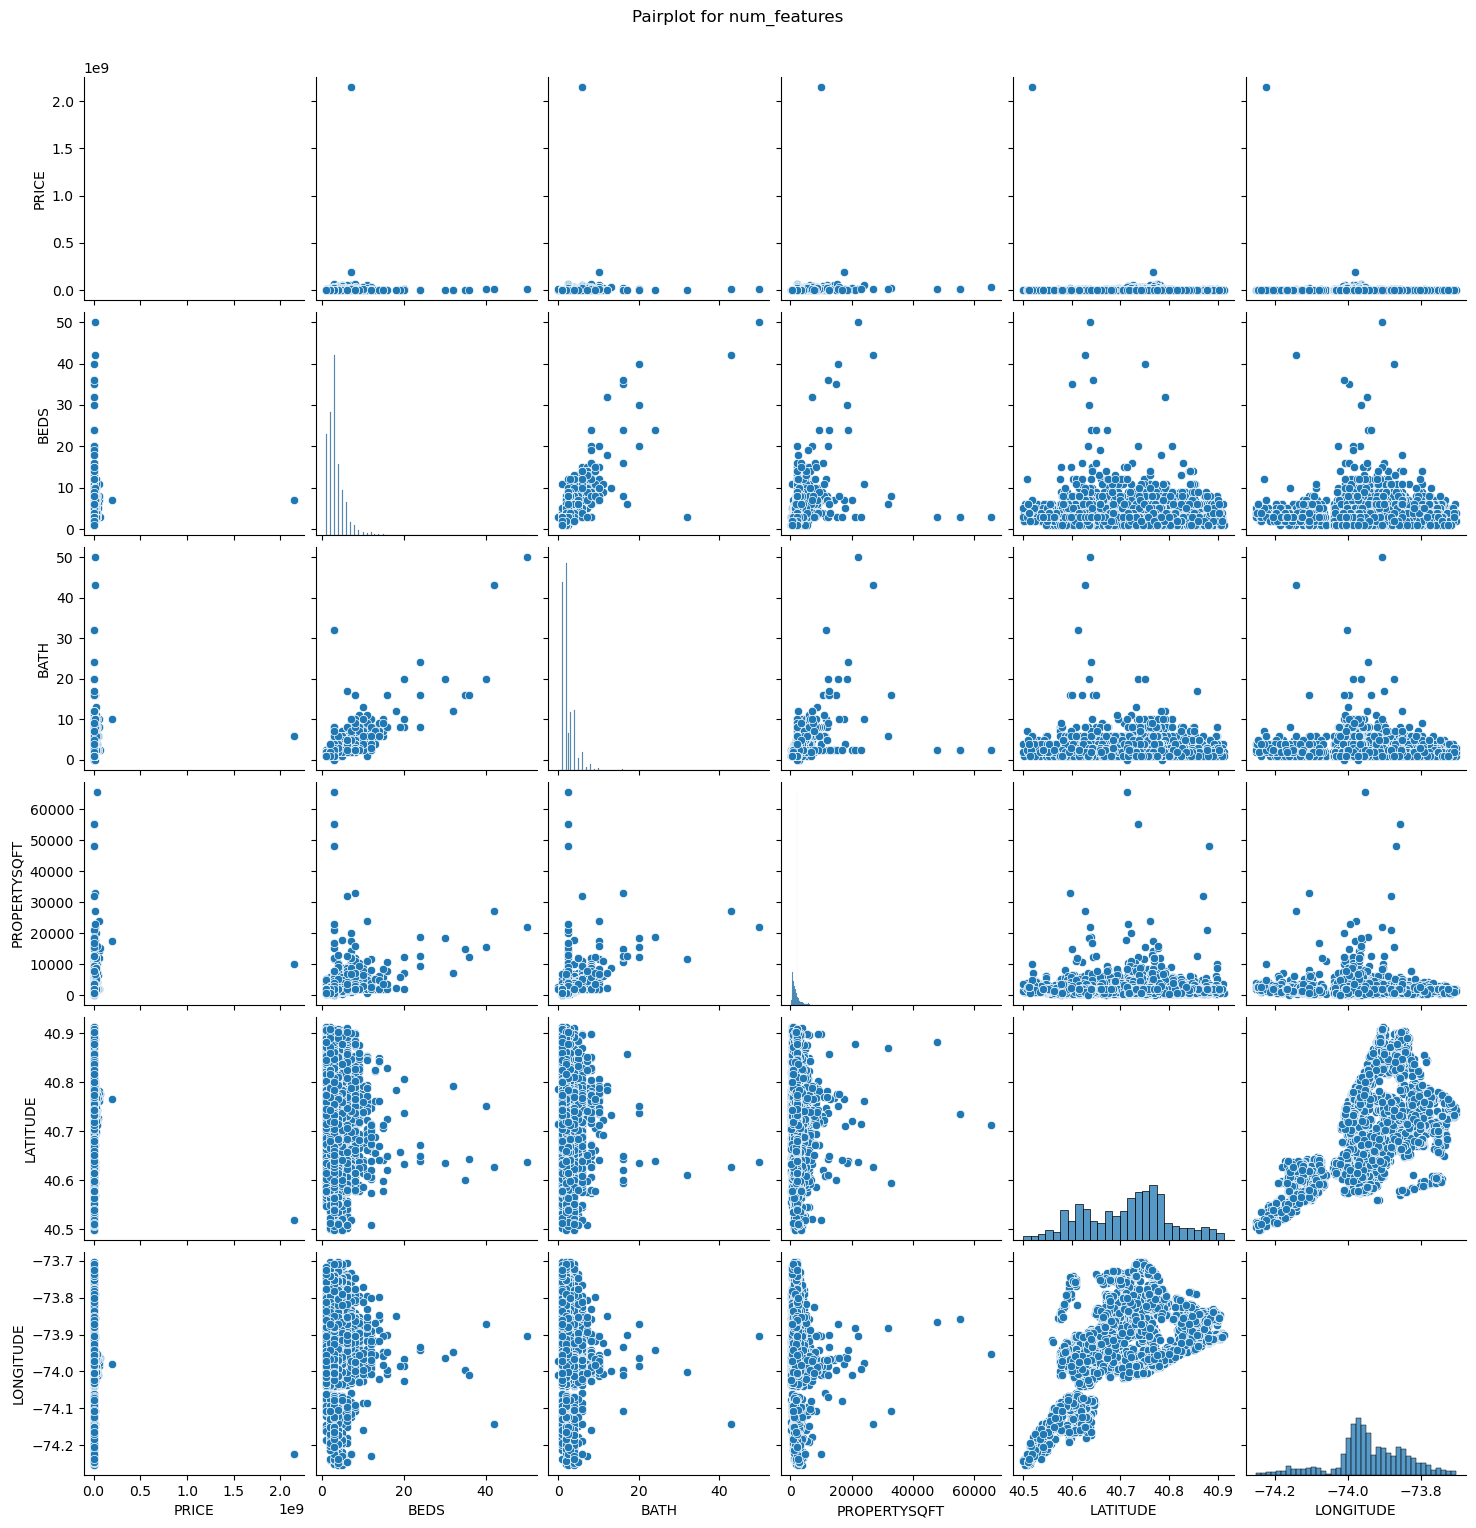

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
sns.pairplot(data[numeric_features])
plt.suptitle('Pairplot for num_features', y=1.02)
plt.show()

In [86]:
# Price Distribution by House Type with Altair - Enhanced Version
# Filter data for better visualization
filtered_data = data[data['PRICE'] < data['PRICE'].quantile(0.95)].copy()  # Remove extreme outliers

price_by_type = alt.Chart(filtered_data).mark_boxplot(
    extent='min-max',
    size=50
).encode(
    x=alt.X('TYPE:N', 
            title='Property Type', 
            axis=alt.Axis(labelAngle=-45, labelFontSize=10),
            sort=alt.EncodingSortField(field='PRICE', op='median', order='descending')),
    y=alt.Y('PRICE:Q', 
            title='Price ($)', 
            scale=alt.Scale(type='log', nice=True),
            axis=alt.Axis(format='$.2s', labelFontSize=10)),
    color=alt.Color('TYPE:N', 
                   scale=alt.Scale(scheme='category10'),
                   legend=None),
    tooltip=[
        alt.Tooltip('TYPE:N', title='Property Type'),
        alt.Tooltip('PRICE:Q', title='Price', format='$.2s'),
        alt.Tooltip('count()', title='Count')
    ]
).properties(
    width=700,
    height=450,
    title=alt.TitleParams(
        text=['NYC Housing Price Distribution by Property Type', '(Log Scale - 95th Percentile Filter Applied)'],
        fontSize=14,
        anchor='start',
        fontWeight='bold'
    )
).resolve_scale(
    color='independent'
)

# Display the chart
price_by_type

alt.Chart(...)

In [87]:
import plotly.graph_objects as go
import plotly.io as pio

# assicurati che LATITUDE/LONGITUDE siano numerici e rimuovi righe senza coordinate
data['LATITUDE'] = pd.to_numeric(data['LATITUDE'], errors='coerce')
data['LONGITUDE'] = pd.to_numeric(data['LONGITUDE'], errors='coerce')
print("NaN lat/lon:", data[['LATITUDE','LONGITUDE']].isna().sum())
df_map = data.dropna(subset=['LATITUDE','LONGITUDE']).copy()

# renderer: in VS Code Notebook prova "vscode"; se non funziona usa "browser"
pio.renderers.default = "vscode"
# pio.renderers.default = "browser"

map_layout = go.Layout(
    map=dict(
        style="open-street-map",
        zoom=9,
        center={"lat": 40.7128, "lon": -74.0060},
    ),
)

scatter_map = go.Scattermap(
    lat=df_map['LATITUDE'],
    lon=df_map['LONGITUDE'],
    mode='markers',
    marker=dict(size=8, color='blue', opacity=0.6),
    text=df_map.get('ADDRESS'),
)

fig = go.Figure(data=[scatter_map], layout=map_layout)
fig.show()

NaN lat/lon: LATITUDE     0
LONGITUDE    0
dtype: int64


In [ ]:
# Property Type Frequency with Altair - Fixed Version
type_counts = data['TYPE'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']

# Add percentage calculation for tooltips
total_count = type_counts['Count'].sum()
type_counts['Percentage'] = (type_counts['Count'] / total_count * 100).round(1)

# Create horizontal bar chart - simplified version without layering issues
type_frequency_chart = alt.Chart(type_counts).mark_bar().encode(
    x=alt.X('Count:Q', title='Number of Properties'),
    y=alt.Y('Type:N', 
           sort=alt.EncodingSortField(field='Count', order='descending'),
           title='Property Type'),
    color=alt.Color('Count:Q', 
                   scale=alt.Scale(scheme='blues'),
                   legend=alt.Legend(title='Property Count')),
    tooltip=[
        alt.Tooltip('Type:N', title='Property Type'),
        alt.Tooltip('Count:Q', title='Number of Properties'),
        alt.Tooltip('Percentage:Q', title='Percentage (%)', format='.1f')
    ]
).properties(
    width=650,
    height=400,
    title=alt.TitleParams(
        text='NYC Property Types Distribution',
        fontSize=16,
        fontWeight='bold'
    )
)

# Display summary statistics
print("📊 NYC Property Type Distribution Summary:")
print("=" * 55)
for i, (_, row) in enumerate(type_counts.iterrows()):
    emoji = "🏠" if i < 3 else "🏢" if i < 6 else "📋"
    print(f"{emoji} {row['Type'][:35]:35} {row['Count']:>6} ({row['Percentage']:>5.1f}%)")

print(f"\n📈 Total Properties: {total_count:,}")
print(f"📊 Property Types: {len(type_counts)}")

# Display the chart (simplified without text labels to avoid LayerChart issues)
type_frequency_chart

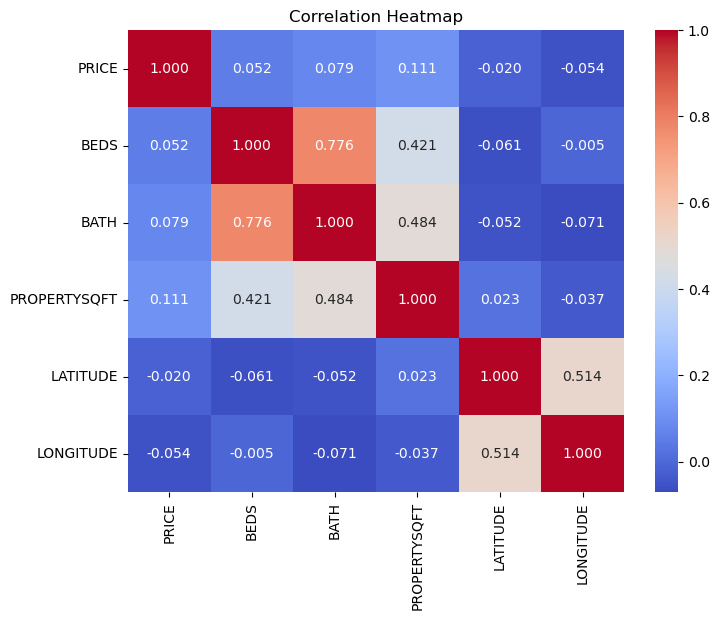

In [89]:
# Heatmap for Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt

corr = data[numeric_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".3f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [90]:
#  Treemap - Top 10 Brokers by Average Price
import plotly.express as px

# Define your background color
background_color = 'rgba(235,236,240,1)'  # This is a light grey

# Calculate the average price per broker and sort them to find the top 10
top_brokers = data.groupby('BROKERTITLE')['PRICE'].mean().sort_values(ascending=False).head(10).reset_index()
fig_treemap = px.treemap(
    top_brokers, 
    path=['BROKERTITLE'], 
    values='PRICE', 
    title='Treemap of Top 10 Brokers by Average Price',
    labels={'BROKERTITLE': 'Broker Title', 'PRICE': 'Average Price'}
)
fig_treemap.update_layout(paper_bgcolor=background_color)
fig_treemap.show()

In [ ]:
# Price Distribution Histogram with Altair - Fixed Version
# Filter extreme outliers for better visualization
price_filtered = data[data['PRICE'] < data['PRICE'].quantile(0.98)].copy()

# Create the main histogram - simplified to avoid LayerChart issues
price_histogram = alt.Chart(price_filtered).mark_bar(
    binSpacing=1,
    stroke='white',
    strokeWidth=0.5,
    opacity=0.8
).encode(
    x=alt.X('PRICE:Q', 
           bin=alt.Bin(maxbins=40),
           scale=alt.Scale(type='log', nice=True),
           title='Price ($) - Log Scale',
           axis=alt.Axis(format='$.2s', labelFontSize=10)),
    y=alt.Y('count()', 
            title='Number of Properties',
            axis=alt.Axis(labelFontSize=10)),
    color=alt.value('steelblue'),
    tooltip=[
        alt.Tooltip('count()', title='Count'),
        alt.Tooltip('PRICE:Q', bin=True, title='Price Range', format='$.2s')
    ]
).properties(
    width=700,
    height=400,
    title=alt.TitleParams(
        text=['NYC Housing Prices Distribution', '(Log Scale, 98th Percentile Filter Applied)'],
        fontSize=16,
        anchor='start',
        fontWeight='bold'
    )
)

# Calculate and display summary statistics separately
mean_price = price_filtered['PRICE'].mean()
median_price = price_filtered['PRICE'].median()

print("📊 Price Distribution Summary:")
print("=" * 40)
print(f"📈 Mean Price: ${mean_price:,.0f}")
print(f"📊 Median Price: ${median_price:,.0f}")
print(f"🏠 Property Count: {len(price_filtered):,}")
print(f"💰 Price Range: ${price_filtered['PRICE'].min():,.0f} - ${price_filtered['PRICE'].max():,.0f}")

# Display the histogram (without text overlay to avoid LayerChart issues)
price_histogram

# Split Data before proceeding

Use only train split to perform EDA and preprocessing, then transform val + test sets.


In [92]:
print("duplicated values in data: ", data.duplicated().sum())
data = data.drop_duplicates()
print("check after deletion of duplicated values in data: " , data.duplicated().sum())

# Drop columns that are not useful for modeling
data = data.drop(['BROKERTITLE','MAIN_ADDRESS','FORMATTED_ADDRESS', 'ADDRESS','LONG_NAME'], axis=1)
data.head()

columns = data.columns
columns = columns.str.lower()
data.columns = columns

# Check for invalid coordinates
data['latitude'] = pd.to_numeric(data['latitude'], errors='coerce')
data['longitude'] = pd.to_numeric(data['longitude'], errors='coerce')
print(f"\nRows with invalid coordinates: {data[['latitude', 'longitude']].isnull().any(axis=1).sum()}")
data = data.dropna(subset=['latitude', 'longitude'])


duplicated values in data:  214
check after deletion of duplicated values in data:  0

Rows with invalid coordinates: 0


In [93]:
from pathlib import Path
import json
from sklearn.model_selection import train_test_split

# Use existing cleaned dataframe `data`
rs = 42
output_dir = Path("data_splits")
output_dir.mkdir(exist_ok=True)

# Try to stratify by price quantiles to preserve price distribution.
# Fall back to TYPE (categorical) if qcut produces only a single bin or fails.
stratify_series = None
try:
    price_bins = pd.qcut(data["price"], q=10, duplicates="drop")
    if price_bins.nunique() > 1:
        stratify_series = price_bins
except Exception:
    print("qcut stratification failed, falling back to TYPE if possible.")
    stratify_series = None

if stratify_series is None and "type" in data.columns and data["type"].nunique() > 1:
    stratify_series = data["type"]

# First split: train (80%) and temp (20% -> val+test)
try:
    train_df, temp_df = train_test_split(
        data,
        test_size=0.2,
        random_state=rs,
        stratify=(stratify_series if stratify_series is None else stratify_series)
    )
except ValueError:
    # If stratification fails (e.g. too few samples per class), split without stratify
    print("Stratified split failed, performing unstratified split.")
    train_df, temp_df = train_test_split(data, test_size=0.2, random_state=rs, stratify=None)

# Second split: val and test (each 10% of original -> 50% of temp)
# If using a stratify_series, align it to temp_df indices
stratify_temp = None
if stratify_series is not None:
    stratify_temp = stratify_series.loc[temp_df.index]

try:
    val_df, test_df = train_test_split(
        temp_df,
        test_size=0.5,
        random_state=rs,
        stratify=stratify_temp
    )
except ValueError:
    val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=rs, stratify=None)


# Preprocessing, Remove outlier, skewness reduction

In [94]:
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)
print("Indices of numeric columns:", [train_df.columns.get_loc(col) for col in numeric_cols])
print("\n")

for column in train_df.select_dtypes(include=[np.number]).columns:
    skewness_per_column = train_df[column].skew()
    print(f"Skewness for {column}: {skewness_per_column}")

Numeric columns: ['price', 'beds', 'bath', 'propertysqft', 'latitude', 'longitude']
Indices of numeric columns: [1, 2, 3, 4, 10, 11]


Skewness for price: 59.53584736130502
Skewness for beds: 5.790287475286434
Skewness for bath: 8.553906531544698
Skewness for propertysqft: 12.783020759177502
Skewness for latitude: -0.09029396219605307
Skewness for longitude: -0.41509207428652645


In [95]:
filter_data=train_df.loc[:, numeric_cols]
filter_data

,price,beds,bath,propertysqft,latitude,longitude
2575,315000,2,1.000000,2184.207862,40.810163,-73.938797
3340,695000,2,2.000000,889.000000,40.803781,-73.946246
1091,2700000,3,3.000000,1398.000000,40.732082,-73.961033
1355,499000,2,2.000000,2184.207862,40.776283,-73.945386
2830,2500000,3,2.373861,2184.207862,40.663713,-73.980684
...,...,...,...,...,...,...
859,350000,2,1.000000,2184.207862,40.639736,-74.018685
255,220000,1,1.000000,590.000000,40.713014,-73.823037
3329,3900000,5,3.000000,2184.207862,40.663254,-73.762621
150,399999,3,1.000000,2184.207862,40.595002,-73.757738


In [96]:
len_dataset_before_outliers_removal = train_df.shape[0]

# Calculate IQR, lower and upper bounds
q1 = filter_data.quantile(0.25)
q3 = filter_data.quantile(0.75)
IQR = q3 - q1
LowerBound = q1 - 1.5 * IQR
UpperBound = q3 + 1.5 * IQR

print("--- Lower Bound ---")
print(LowerBound)
print("\n")
print("--- Upper Bound ---")
print(UpperBound)

# build a mask that is True only for rows that are within IQR bounds for all numeric columns
mask = pd.Series(True, index=train_df.index)
for column in filter_data.columns:
    Q1 = filter_data[column].quantile(0.25)
    Q3 = filter_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask &= train_df[column].between(lower_bound, upper_bound, inclusive='both')

# apply mask once to remove outlier rows entirely
train_df = train_df.loc[mask].copy()


--- Lower Bound ---
price          -1.001000e+06
beds           -1.000000e+00
bath           -2.000000e+00
propertysqft   -2.763118e+02
latitude        4.043971e+01
longitude      -7.416636e+01
dtype: float64


--- Upper Bound ---
price           2.999000e+06
beds            7.000000e+00
bath            6.000000e+00
propertysqft    3.660520e+03
latitude        4.097311e+01
longitude      -7.369103e+01
dtype: float64


In [97]:
print("Dataset shape before outliers removal: ", len_dataset_before_outliers_removal)
print("Dataset shape after outliers removal: ", train_df.shape[0])
print("\n")
train_df.info()

Dataset shape before outliers removal:  3669
Dataset shape after outliers removal:  2948


<class 'pandas.core.frame.DataFrame'>
Index: 2948 entries, 2575 to 2348
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   type                         2948 non-null   object 
 1   price                        2948 non-null   int64  
 2   beds                         2948 non-null   int64  
 3   bath                         2948 non-null   float64
 4   propertysqft                 2948 non-null   float64
 5   state                        2948 non-null   object 
 6   administrative_area_level_2  2948 non-null   object 
 7   locality                     2948 non-null   object 
 8   sublocality                  2948 non-null   object 
 9   street_name                  2948 non-null   object 
 10  latitude                     2948 non-null   float64
 11  longitude                    2948 non-null   

In [98]:
#no NaN values so we removed outliers
train_df.isna().sum()

type                           0
price                          0
beds                           0
bath                           0
propertysqft                   0
state                          0
administrative_area_level_2    0
locality                       0
sublocality                    0
street_name                    0
latitude                       0
longitude                      0
dtype: int64

In [99]:
# Price Distribution by Property Type (After Outlier Removal) with Altair - Enhanced
clean_price_by_type = alt.Chart(train_df).mark_boxplot(
    extent='min-max',
    size=60
).encode(
    x=alt.X('type:N', 
            title='Property Type', 
            axis=alt.Axis(labelAngle=-45, labelFontSize=11),
            sort=alt.EncodingSortField(field='price', op='median', order='descending')),
    y=alt.Y('price:Q', 
            title='Price ($)', 
            scale=alt.Scale(type='log', nice=True),
            axis=alt.Axis(format='$.2s', labelFontSize=11)),
    color=alt.Color('type:N', 
                   scale=alt.Scale(scheme='set1'),
                   legend=alt.Legend(title='Property Type', titleFontSize=12)),
    tooltip=[
        alt.Tooltip('type:N', title='Property Type'),
        alt.Tooltip('price:Q', title='Price', format='$.2s'),
        alt.Tooltip('count()', title='Count')
    ]
).properties(
    width=700,
    height=450,
    title=alt.TitleParams(
        text=['NYC Housing Prices by Property Type', '(After Outlier Removal - Log Scale)'],
        fontSize=16,
        anchor='start',
        fontWeight='bold'
    )
)

# Add summary statistics
summary_stats = train_df.groupby('type')['price'].agg(['count', 'median', 'mean']).reset_index()
summary_stats['median_formatted'] = summary_stats['median'].apply(lambda x: f'${x:,.0f}')

print("📊 Summary Statistics After Outlier Removal:")
print(f"Total properties: {len(train_df):,}")
print(f"Price range: ${train_df['price'].min():,.0f} - ${train_df['price'].max():,.0f}")
print("\\nBy Property Type:")
for _, row in summary_stats.iterrows():
    print(f"  {row['type']}: {row['count']} properties, median ${row['median']:,.0f}")

# Display the chart
clean_price_by_type

📊 Summary Statistics After Outlier Removal:
Total properties: 2,948
Price range: $2,494 - $2,999,000
\nBy Property Type:
  Co-op for sale: 1028 properties, median $398,000
  Coming Soon: 2 properties, median $1,172,000
  Condo for sale: 552 properties, median $725,000
  Condop for sale: 3 properties, median $1,065,000
  Contingent: 55 properties, median $695,000
  For sale: 10 properties, median $874,500
  Foreclosure: 9 properties, median $499,000
  House for sale: 618 properties, median $799,000
  Land for sale: 27 properties, median $650,000
  Mobile house for sale: 1 properties, median $1,288,000
  Multi-family home for sale: 384 properties, median $999,945
  Pending: 164 properties, median $750,000
  Townhouse for sale: 95 properties, median $1,198,000


alt.Chart(...)

## Feature Engineering - Geographical Variables

In [100]:
from math import radians
from sklearn.cluster import KMeans

# Geographic feature engineering class to ensure no data leakage
class GeographicFeatureEngineer:
    """Geographic feature engineering that fits on training data only"""
    
    def __init__(self, n_clusters=20, city_center=(40.7128, -74.0060)):
        self.n_clusters = n_clusters
        self.city_center = city_center
        self.kmeans = None
        self.density_stats = None
        
    def _haversine_km(self, lat1, lon1, lat2, lon2):
        """Calculate haversine distance in km"""
        EARTH_KM = 6371.0088
        lat1r, lon1r, lat2r, lon2r = map(np.radians, [lat1, lon1, lat2, lon2])
        dlat = lat2r - lat1r
        dlon = lon2r - lon1r
        a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1r) * np.cos(lat2r) * np.sin(dlon / 2.0) ** 2
        return 2 * EARTH_KM * np.arcsin(np.sqrt(a))
    
    def fit(self, df):
        """Fit on training data only"""
        print("Fitting geographic features on training data...")
        
        # Fit KMeans clustering
        coords = df[['latitude', 'longitude']].values
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=42, n_init=10)
        self.kmeans.fit(coords)
        
        # Calculate density statistics for training data
        lat_bin_size, lon_bin_size = 0.01, 0.01
        df_temp = df.copy()
        df_temp['lat_bin'] = (np.floor(df_temp['latitude'] / lat_bin_size) * lat_bin_size).round(6)
        df_temp['lon_bin'] = (np.floor(df_temp['longitude'] / lon_bin_size) * lon_bin_size).round(6)
        
        # Store density statistics
        self.density_stats = df_temp.groupby(['lat_bin', 'lon_bin']).size().reset_index(name='count')
        self.density_stats['lat_center'] = self.density_stats['lat_bin'] + lat_bin_size / 2.0
        self.density_stats['lon_center'] = self.density_stats['lon_bin'] + lon_bin_size / 2.0
        
        # Calculate area and density
        self.density_stats['height_km'] = self._haversine_km(
            self.density_stats['lat_center'], self.density_stats['lon_center'],
            self.density_stats['lat_center'] + lat_bin_size, self.density_stats['lon_center']
        )
        self.density_stats['width_km'] = self._haversine_km(
            self.density_stats['lat_center'], self.density_stats['lon_center'],
            self.density_stats['lat_center'], self.density_stats['lon_center'] + lon_bin_size
        )
        self.density_stats['area_km2'] = self.density_stats['height_km'] * self.density_stats['width_km']
        self.density_stats['density_listings_per_km2'] = (
            self.density_stats['count'] / (self.density_stats['area_km2'] + 1e-6)
        )
        
        print(f"  Fitted {self.n_clusters} geographic clusters")
        print(f"  Calculated density for {len(self.density_stats)} grid cells")
        return self
    
    def transform(self, df):
        """Transform any dataset using fitted parameters"""
        df_result = df.copy()
        
        # Distance to city center
        df_result['dist_to_center_km'] = self._haversine_km(
            df_result['latitude'], df_result['longitude'],
            self.city_center[0], self.city_center[1]
        )
        
        # Geographic clusters
        if self.kmeans is not None:
            coords = df_result[['latitude', 'longitude']].values
            df_result['geo_cluster'] = self.kmeans.predict(coords)
        else:
            df_result['geo_cluster'] = np.nan
            
        # Property density
        if self.density_stats is not None:
            lat_bin_size, lon_bin_size = 0.01, 0.01
            df_result['lat_bin'] = (np.floor(df_result['latitude'] / lat_bin_size) * lat_bin_size).round(6)
            df_result['lon_bin'] = (np.floor(df_result['longitude'] / lon_bin_size) * lon_bin_size).round(6)

            # Merge with density stats
            df_result = df_result.merge(
                self.density_stats[['lat_bin', 'lon_bin', 'density_listings_per_km2']],
                on=['lat_bin', 'lon_bin'], how='left'
            )
            
            # Fill missing densities with median
            median_density = self.density_stats['density_listings_per_km2'].median()
            df_result['density_listings_per_km2'] = df_result['density_listings_per_km2'].fillna(median_density)
            
            # Clean up temporary columns
            df_result = df_result.drop(columns=['lat_bin', 'lon_bin'])
        else:
            # If density_stats not available, fill with NaN
            df_result['density_listings_per_km2'] = np.nan
        
        return df_result
    
# Fit on training data only
geo_engineer = GeographicFeatureEngineer(n_clusters=20)
geo_engineer.fit(train_df)
# Transform all datasets
train_features = geo_engineer.transform(train_df)
val_features = geo_engineer.transform(val_df)
test_features = geo_engineer.transform(test_df)

print(f"\nFeature engineering complete:")
print(f"  New columns: {[col for col in train_features.columns if col not in train_df.columns]}")
print(f"  Train shape: {train_features.shape}")
print(f"  Val shape: {val_features.shape}")
print(f"  Test shape: {test_features.shape}")

Fitting geographic features on training data...
  Fitted 20 geographic clusters
  Calculated density for 631 grid cells

Feature engineering complete:
  New columns: ['dist_to_center_km', 'geo_cluster', 'density_listings_per_km2']
  Train shape: (2948, 15)
  Val shape: (459, 15)
  Test shape: (459, 15)


In [132]:
# Interactive Geographic Analysis with Altair - Fixed Scale Version

# 1. Geographic Clusters Scatter Plot
geo_clusters_chart = alt.Chart(train_features.sample(n=min(1000, len(train_features)))).mark_circle(
    size=80,
    opacity=0.7
).encode(
    x=alt.X('longitude:Q', 
            title='Longitude', 
            scale=alt.Scale(domain=[-74.25, -73.70]),  # Fixed scale for NYC longitude
            axis=alt.Axis(labelFontSize=10)),
    y=alt.Y('latitude:Q', 
            title='Latitude', 
            scale=alt.Scale(domain=[40.50, 40.92]),   # Fixed scale for NYC latitude
            axis=alt.Axis(labelFontSize=10)),
    color=alt.Color('geo_cluster:O', 
                   scale=alt.Scale(scheme='category20'),
                   title='Geographic Cluster'),
    tooltip=[
        alt.Tooltip('latitude:Q', title='Latitude', format='.4f'),
        alt.Tooltip('longitude:Q', title='Longitude', format='.4f'), 
        alt.Tooltip('geo_cluster:O', title='Cluster'),
        alt.Tooltip('price:Q', title='Price', format='$.2s'),
        alt.Tooltip('sublocality:N', title='Area')
    ]
).properties(
    width=600,
    height=500,
    title=alt.TitleParams(
        text='Geographic Clusters in NYC',
        fontSize=16,
        fontWeight='bold'
    )
)

# 2. Price vs Distance from Center
price_distance_chart = alt.Chart(train_features.sample(n=min(1000, len(train_features)))).mark_circle(
    size=70,
    opacity=0.7
).encode(
    x=alt.X('dist_to_center_km:Q', 
            title='Distance from Manhattan Center (km)',
            axis=alt.Axis(labelFontSize=10)),
    y=alt.Y('price:Q', 
            title='Price ($)',
            scale=alt.Scale(type='log', nice=True),
            axis=alt.Axis(format='$.2s', labelFontSize=10)),
    color=alt.Color('price:Q', 
                   scale=alt.Scale(scheme='viridis', type='log'),
                   title='Price ($)',
                   legend=alt.Legend(format='$.2s')),
    tooltip=[
        alt.Tooltip('dist_to_center_km:Q', title='Distance (km)', format='.1f'),
        alt.Tooltip('price:Q', title='Price', format='$.2s'),
        alt.Tooltip('sublocality:N', title='Area'),
        alt.Tooltip('type:N', title='Type')
    ]
).properties(
    width=600,
    height=500,
    title=alt.TitleParams(
        text='Price vs Distance from Manhattan Center',
        fontSize=16,
        fontWeight='bold'
    )
)

# 3. Property Density Scatter - Fixed Scale
density_scatter = alt.Chart(train_features.sample(n=min(1000, len(train_features)))).mark_circle(
    size=100,
    opacity=0.8
).encode(
    x=alt.X('longitude:Q', 
            title='Longitude',
            scale=alt.Scale(domain=[-74.25, -73.70]),  # Fixed scale for NYC longitude
            axis=alt.Axis(labelFontSize=10)),
    y=alt.Y('latitude:Q', 
            title='Latitude',
            scale=alt.Scale(domain=[40.50, 40.92]),   # Fixed scale for NYC latitude
            axis=alt.Axis(labelFontSize=10)),
    color=alt.Color('density_listings_per_km2:Q',
                   scale=alt.Scale(scheme='oranges', type='log'),
                   title='Density (listings/km²)',
                   legend=alt.Legend(format='.0f')),
    tooltip=[
        alt.Tooltip('latitude:Q', title='Latitude', format='.4f'),
        alt.Tooltip('longitude:Q', title='Longitude', format='.4f'),
        alt.Tooltip('density_listings_per_km2:Q', title='Density/km²', format='.0f'),
        alt.Tooltip('sublocality:N', title='Area')
    ]
).properties(
    width=600,
    height=500,
    title=alt.TitleParams(
        text='Property Density Across NYC',
        fontSize=16,
        fontWeight='bold'
    )
)

# 4. Price by Geographic Cluster
price_by_cluster = alt.Chart(train_features).mark_boxplot(
    size=40
).encode(
    x=alt.X('geo_cluster:O', 
            title='Geographic Cluster',
            axis=alt.Axis(labelFontSize=10)),
    y=alt.Y('price:Q', 
            title='Price ($)',
            scale=alt.Scale(type='log', nice=True),
            axis=alt.Axis(format='$.2s', labelFontSize=10)),
    color=alt.Color('geo_cluster:O', 
                   scale=alt.Scale(scheme='set3'),
                   legend=None),
    tooltip=[
        alt.Tooltip('geo_cluster:O', title='Cluster'),
        alt.Tooltip('price:Q', title='Price', format='$.2s'),
        alt.Tooltip('count()', title='Count')
    ]
).properties(
    width=700,
    height=400,
    title=alt.TitleParams(
        text='Price Distribution by Geographic Cluster',
        fontSize=16,
        fontWeight='bold'
    )
)

# Create a 2x2 layout
chart1_2 = alt.hconcat(geo_clusters_chart, price_distance_chart).resolve_scale(color='independent')
chart3_4 = alt.hconcat(density_scatter, price_by_cluster.properties(width=600)).resolve_scale(color='independent')
final_geo_charts = alt.vconcat(chart1_2, chart3_4)

print("🗽 Geographic Analysis - Scale Fixed for NYC:")
print("  📍 Latitude range: 40.50 - 40.92 (focused on NYC area)")
print("  📍 Longitude range: -74.25 - -73.70 (focused on NYC area)")
print("  🎯 Charts now show proper NYC geographic boundaries")

# Display the combined chart
final_geo_charts

🗽 Geographic Analysis - Scale Fixed for NYC:
  📍 Latitude range: 40.50 - 40.92 (focused on NYC area)
  📍 Longitude range: -74.25 - -73.70 (focused on NYC area)
  🎯 Charts now show proper NYC geographic boundaries


alt.VConcatChart(...)

In [102]:
# Calculate skewness for each column after compute the IQR for each column:¶
numeric_cols = train_features.select_dtypes(include=[np.number]).columns.tolist()
for column in numeric_cols:
    skewness_per_column = train_features[column].skew()
    print(f"Skewness for {column}: {skewness_per_column}")

Skewness for price: 1.370112046118275
Skewness for beds: 0.817952025621387
Skewness for bath: 1.2872243369039649
Skewness for propertysqft: -0.035931543583588486
Skewness for latitude: 0.08243893552560487
Skewness for longitude: -0.24354141184343225
Skewness for dist_to_center_km: 0.057231557618934045
Skewness for geo_cluster: 0.12410586815774063
Skewness for density_listings_per_km2: 1.2946421224638167


In [103]:
# Enhanced Correlation Analysis with Altair
numeric_cols = train_features.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlation matrix
correlation_matrix = train_features[numeric_cols].corr()

# Convert correlation matrix to long format for Altair
corr_data = []
for i, col1 in enumerate(correlation_matrix.columns):
    for j, col2 in enumerate(correlation_matrix.columns):
        corr_data.append({
            'variable_1': col1,
            'variable_2': col2,
            'correlation': correlation_matrix.iloc[i, j],
            'abs_correlation': abs(correlation_matrix.iloc[i, j])
        })

corr_df = pd.DataFrame(corr_data)

# Create correlation heatmap
correlation_heatmap = alt.Chart(corr_df).mark_rect(
    stroke='white',
    strokeWidth=1
).encode(
    x=alt.X('variable_1:N', 
            title='Variables', 
            axis=alt.Axis(labelAngle=-45, labelFontSize=10)),
    y=alt.Y('variable_2:N', 
            title='Variables',
            axis=alt.Axis(labelFontSize=10)),
    color=alt.Color('correlation:Q',
                   scale=alt.Scale(scheme='redblue', domain=[-1, 1]),
                   title='Correlation',
                   legend=alt.Legend(titleFontSize=12)),
    tooltip=[
        alt.Tooltip('variable_1:N', title='Variable 1'),
        alt.Tooltip('variable_2:N', title='Variable 2'),
        alt.Tooltip('correlation:Q', title='Correlation', format='.3f')
    ]
).properties(
    width=500,
    height=500,
    title=alt.TitleParams(
        text='Correlation Matrix - Numeric Variables',
        fontSize=16,
        fontWeight='bold'
    )
)

# Add correlation text on heatmap
correlation_text = alt.Chart(corr_df).mark_text(
    baseline='middle',
    fontSize=9,
    fontWeight='bold'
).encode(
    x=alt.X('variable_1:N'),
    y=alt.Y('variable_2:N'),
    text=alt.Text('correlation:Q', format='.2f'),
    color=alt.condition(
        alt.datum.abs_correlation > 0.5,
        alt.value('white'),
        alt.value('black')
    )
)

# Combine heatmap with text
correlation_with_text = correlation_heatmap + correlation_text

# Price correlation bar chart
price_corr = correlation_matrix['price'].abs().sort_values(ascending=True)
price_corr_df = price_corr.reset_index()
price_corr_df.columns = ['variable', 'correlation']
price_corr_df = price_corr_df[price_corr_df['variable'] != 'price']  # Remove self-correlation

price_correlation_chart = alt.Chart(price_corr_df).mark_bar(
    cornerRadiusTopRight=5,
    cornerRadiusBottomRight=5,
    stroke='white',
    strokeWidth=1
).encode(
    x=alt.X('correlation:Q', 
            title='Absolute Correlation with Price',
            axis=alt.Axis(labelFontSize=10)),
    y=alt.Y('variable:N', 
            sort='-x', 
            title='Variable',
            axis=alt.Axis(labelFontSize=10, labelLimit=150)),
    color=alt.Color('correlation:Q',
                   scale=alt.Scale(scheme='blues'),
                   title='Correlation Strength',
                   legend=None),
    tooltip=[
        alt.Tooltip('variable:N', title='Variable'),
        alt.Tooltip('correlation:Q', title='Abs. Correlation', format='.3f')
    ]
).properties(
    width=500,
    height=400,
    title=alt.TitleParams(
        text='Feature Correlations with Price',
        fontSize=16,
        fontWeight='bold'
    )
)

# Add correlation values as text labels
corr_text_labels = alt.Chart(price_corr_df).mark_text(
    align='left',
    baseline='middle',
    dx=5,
    fontSize=10,
    fontWeight='bold'
).encode(
    x=alt.X('correlation:Q'),
    y=alt.Y('variable:N', sort='-x'),
    text=alt.Text('correlation:Q', format='.3f'),
    color=alt.value('black')
)

price_correlation_with_labels = price_correlation_chart + corr_text_labels

# Combine both charts side by side
final_correlation_analysis = alt.hconcat(
    correlation_with_text, 
    price_correlation_with_labels
).resolve_scale(color='independent')

print("🔍 CORRELATION ANALYSIS SUMMARY:")
print("=" * 50)
print("\nStrongest correlations with price:")
for var, corr in price_corr.items():
    if var != 'price':
        print(f"  📊 {var}: {corr:.3f}")

print(f"\n📈 Top 3 predictive features:")
top_3 = price_corr_df.tail(3)
for _, row in top_3.iterrows():
    print(f"  ⭐ {row['variable']}: {row['correlation']:.3f}")

# Display the final chart
final_correlation_analysis

🔍 CORRELATION ANALYSIS SUMMARY:

Strongest correlations with price:
  📊 density_listings_per_km2: 0.010
  📊 latitude: 0.046
  📊 geo_cluster: 0.064
  📊 longitude: 0.131
  📊 dist_to_center_km: 0.324
  📊 propertysqft: 0.348
  📊 beds: 0.379
  📊 bath: 0.549

📈 Top 3 predictive features:
  ⭐ propertysqft: 0.348
  ⭐ beds: 0.379
  ⭐ bath: 0.549


alt.HConcatChart(...)

In [104]:
# Final data quality assessment - all datasets
print("=== FINAL DATA QUALITY ASSESSMENT ===")

datasets = {
    'Training': train_features,
    'Validation': val_features,
    'Test': test_features
}

numeric_cols_new = train_features.select_dtypes(include=[np.number]).columns.tolist()

for name, df in datasets.items():
    print(f"\n{name} dataset:")
    print(f"  Shape: {df.shape}")
    print(f"  Missing values: {df.isnull().sum().sum()}")
    
    # Skewness for numeric columns
    print(f"  Skewness:")
    for col in numeric_cols_new:
        if col in df.columns:
            skew = df[col].skew()
            print(f"    {col}: {skew:.3f}")

# Check consistency across datasets
print(f"\n=== DATASET CONSISTENCY CHECK ===")
print(f"All datasets have same columns: {set(train_features.columns) == set(val_features.columns) == set(test_features.columns)}")
print(f"All datasets have same data types: {train_features.dtypes.equals(val_features.dtypes) and val_features.dtypes.equals(test_features.dtypes)}")

=== FINAL DATA QUALITY ASSESSMENT ===

Training dataset:
  Shape: (2948, 15)
  Missing values: 0
  Skewness:
    price: 1.370
    beds: 0.818
    bath: 1.287
    propertysqft: -0.036
    latitude: 0.082
    longitude: -0.244
    dist_to_center_km: 0.057
    geo_cluster: 0.124
    density_listings_per_km2: 1.295

Validation dataset:
  Shape: (459, 15)
  Missing values: 0
  Skewness:
    price: 6.875
    beds: 3.727
    bath: 4.525
    propertysqft: 12.717
    latitude: -0.097
    longitude: -0.354
    dist_to_center_km: 0.284
    geo_cluster: 0.099
    density_listings_per_km2: 1.344

Test dataset:
  Shape: (459, 15)
  Missing values: 0
  Skewness:
    price: 15.801
    beds: 4.187
    bath: 2.839
    propertysqft: 7.685
    latitude: -0.067
    longitude: -0.234
    dist_to_center_km: 0.392
    geo_cluster: 0.159
    density_listings_per_km2: 1.330

=== DATASET CONSISTENCY CHECK ===
All datasets have same columns: True
All datasets have same data types: True


# Save datasets obtained

In [105]:
# Save splits (parquet preferred; also save CSV for compatibility)
output_dir = Path("../data/processed/data_splits")
output_dir.mkdir(parents=True, exist_ok=True)

train_features.to_parquet(output_dir / "train.parquet", index=False)
val_features.to_parquet(output_dir / "val.parquet", index=False)
test_features.to_parquet(output_dir / "test.parquet", index=False)

train_features.to_csv(output_dir / "train.csv", index=False)
val_features.to_csv(output_dir / "val.csv", index=False)
test_features.to_csv(output_dir / "test.csv", index=False)

# Save a small manifest describing the split
manifest = {
    "random_state": rs,
    "n_total": int(data.shape[0]),
    "n_train": int(train_features.shape[0]),
    "n_val": int(val_features.shape[0]),
    "n_test": int(test_features.shape[0]),
    "stratify_used": ("price_qcut" if (stratify_series is not None and 'qcut' in str(type(price_bins))) else ("type" if stratify_series is not None and "type" in data.columns else None))
}
with open(output_dir / "manifest.json", "w") as f:
    json.dump(manifest, f, indent=2)

# Print summary
print(f"Saved splits to {output_dir}. Sizes -> train: {train_features.shape[0]}, val: {val_features.shape[0]}, test: {test_features.shape[0]}")

# Create a final summary visualization showing dataset splits
split_summary_data = pd.DataFrame({
    'Split': ['Train', 'Validation', 'Test'],
    'Count': [train_features.shape[0], val_features.shape[0], test_features.shape[0]],
    'Percentage': [
        train_features.shape[0] / data.shape[0] * 100,
        val_features.shape[0] / data.shape[0] * 100,
        test_features.shape[0] / data.shape[0] * 100
    ]
})

split_chart = alt.Chart(split_summary_data).mark_arc(
    innerRadius=50,
    outerRadius=120
).encode(
    theta=alt.Theta('Count:Q', title='Number of Properties'),
    color=alt.Color('Split:N', 
                   scale=alt.Scale(scheme='set2'),
                   title='Dataset Split'),
    tooltip=['Split:N', 'Count:Q', alt.Tooltip('Percentage:Q', format='.1f', title='Percentage (%)')]
).properties(
    width=300,
    height=300,
    title='Dataset Split Distribution'
)

split_chart.show()

Saved splits to ../data/processed/data_splits. Sizes -> train: 2948, val: 459, test: 459


alt.Chart(...)